# The Classical TTauri Locus in the JHKs colour-colour diagram for 2MASS filters

**@juliaroquette 19 Nov 2023** 

In this notebook, I am implementing the ingredients required for getting individual extinction estimates on the JHK colour-colour diagram by de-reddening YSOs down to the CTTS Loucs. I start by first updating some of the ingredients behind the CTTS locus.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

<u>**Reddening**</u>: The reddening law adopted is the one by [Indebetouw et al. 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...619..931I/abstract)

For Orion: l=209.0117 b=-19.3829. Nevertheless, for future simplification, I will simply adopt the averafe value from Table 1 from Indebetouw et al. 2005::

- $\frac{A_J}{A_K}=2.5\pm0.14$
- $\frac{A_H}{A_K}=1.55\pm0.08$
- $\frac{A_K}{A_K}=1$

Following [Indebetouw et al. 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...619..931I/abstract) we adopt $\frac{A_K}{A_V}\sim8.8$ for $R_V=3.1$ from Cardeli+1989. Hence:

- $\frac{A_J}{A_V}=0.284\pm0.016$
- $\frac{A_H}{A_V}=0.176\pm0.009$
- $\frac{A_K}{A_K}=0.114$

It is also relevant to propagate these uncertainties directly to the colour reddenings:
- $A_{J-H} = 0.108 \pm 0.018$
- $A_{H-Ks}=0.062 \pm 0.009$

In [2]:
np.sqrt(.016**2+.009**2)

0.018357559750685818

In [3]:
def A_J(Av, value=None):
    if value == 'up':
        return (0.284 + 0.016)*Av
    elif value == 'bottom':
        return (0.284 - 0.016)*Av
    else:
        return 0.284*Av

def A_H(Av, value=None):
    if value == 'up':
        return (0.176 + 0.009)*Av
    elif value == 'bottom':
        return (0.176 - 0.009)*Av
    else:
        return 0.176*Av

def A_Ks(Av):
    return 0.114*Av

def A_JH(Av, value=None):
    if value == 'up':
        return (0.108 + 0.018)*Av
    elif value == 'bottom':
        return (0.108 - 0.018)*Av
    else:
        return 0.108*Av

def A_HKs(Av, value=None):
    if value == 'up':
        return (0.062 + 0.009)*Av
    elif value == 'bottom':
        return (0.062 - 0.009)*Av
    else:
        return 0.062*Av    

<u>**Empirical Sequences**:</u> I use the empirical sequences provided in [Pecaut&Mamajek (2013)](https://ui.adsabs.harvard.edu/abs/2013ApJS..208....9P/abstract) to define the region in the JHKs (2MASS) colour-colour diagram occupied by dwarf stars and PMS stars with normal photospheric colours (no disk).

- **Dwarfs**: For Dwarf stars I used the [updated Pecault&Mamajek 2013 Empirical Sequence](https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt) provided by Mamajek on his website. 
- **PMS Giants** For PMS Giants I used the data [Table 6 from Pecault&Mamajek 2013: "Intrinsic colors of 5-30Myr old stars and adopted Teff, bolometric correction values" available from CDS](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/ApJS/208/9/table6)


In [4]:
from isoc import PecautMamajek2013
pms_giant = PecautMamajek2013(table="PMS")

In [5]:
pm_url = 'https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt'
dwarf = pd.read_table(pm_url, skiprows=23, delim_whitespace=True, comment='#',
                   names=['SpT', 'Teff', 'logT', 'BCv', 'logL', 'Mbol', 'R_Rsun', 
                      'Mv', 'B-V', 'Bt-Vt',  'G-V', 'Bp-Rp', 'G-Rp', 'M_G', 
                      'b-y', 'U-B', 'V-Rc', 'V-Ic', 'V-Ks', 'J-H', 'H-Ks',
                      'M_J', 'M_Ks', 'Ks-W1', 'W1-W2', 'W1-W3', 'W1-W4',
                      'g-r', 'i-z', 'z-Y', 'Msun', 'SpT_'], na_values=['...', '.....'])

In [6]:
dwarf = dwarf[~dwarf['SpT'].str.startswith(( 'L', 'T'))] #drops stars with spectral types T or L

In [7]:
dwarf = dwarf.dropna(subset=['J-H', 'H-Ks']) #drops stars that do not have valid JHK colours?

This plot shows each of the stars in the Dwarf sequence reddened for up to 15 mags. The region defined by the graw shadowing is normally labelled the *Photospheric colours* region of the JHK colour-colour diagram. 

In [8]:
dwarf

,SpT,Teff,logT,BCv,logL,Mbol,R_Rsun,Mv,B-V,Bt-Vt,...,M_Ks,Ks-W1,W1-W2,W1-W3,W1-W4,g-r,i-z,z-Y,Msun,SpT_
10,O9V,33300,4.522,-3.11,4.82,-7.31,7.72,-4.20,-0.312,NaN,...,-3.20,NaN,NaN,NaN,NaN,-0.620,NaN,NaN,20.200,O9V
11,O9.5V,31900,4.504,-3.01,4.72,-7.06,7.50,-4.05,-0.307,NaN,...,-3.073,NaN,NaN,NaN,NaN,-0.605,NaN,NaN,18.700,O9.5V
12,B0V,31400,4.497,-2.99,4.65,-6.89,7.16,-3.90,-0.301,NaN,...,-2.942,0.016,NaN,NaN,NaN,-0.590,NaN,NaN,17.700,B0V
13,B0.5V,29000,4.462,-2.83,4.43,-6.33,6.48,-3.50,-0.289,NaN,...,-2.587,0.017,NaN,NaN,NaN,-0.540,NaN,NaN,14.800,B0.5V
14,B1V,26000,4.415,-2.58,4.13,-5.58,5.71,-3.00,-0.278,NaN,...,-2.126,0.018,NaN,NaN,NaN,-0.490,NaN,NaN,11.800,B1V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,M7.5V,2630,3.420,-5.32,-3.24,12.84,0.116,18.16,2.14,NaN,...,9.81,0.260,0.250,NaN,NaN,NaN,1.85,0.74,0.088,M7.5V
83,M8V,2570,3.410,-5.65,-3.28,12.95,0.114,18.60,2.15,NaN,...,9.92,0.285,0.260,NaN,NaN,NaN,1.93,0.77,0.085,M8V
84,M8.5V,2420,3.384,-5.78,-3.47,13.42,0.104,19.20,2.16,NaN,...,10.30,0.310,0.265,NaN,NaN,NaN,1.96,0.80,0.080,M8.5V
85,M9V,2380,3.377,-5.86,-3.52,13.54,0.102,19.40,2.17,NaN,...,10.40,0.330,0.270,NaN,NaN,NaN,1.99,0.82,0.079,M9V


/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/1072357391.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/1072357391.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')


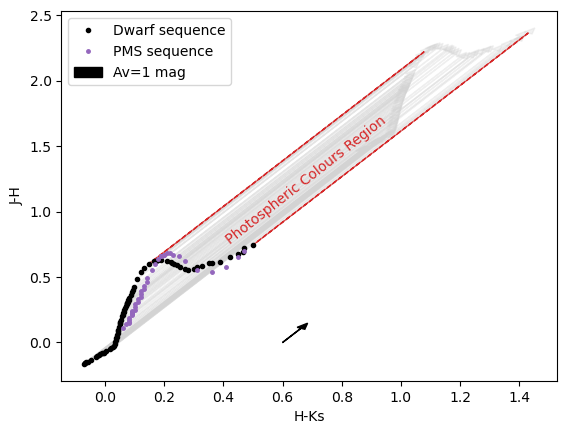

In [9]:
plt.plot(dwarf['H-Ks'].to_numpy(), dwarf['J-H'].to_numpy(),  'k.',
         label='Dwarf sequence')
plt.plot(pms_giant.HKs, pms_giant.JH,  '.', color='tab:purple', ms=5,
         label='PMS sequence')
#
Av = 1
plt.arrow(0.6, 0.0, dy=A_JH(Av), dx=A_HKs(Av), head_width=.03, 
          color='k', label='Av=1 mag')
#
#
Av = 15
for spt in dwarf.SpT : #['O9V', 'B9V', 'A0V', 'A1V', 'A2V', 'A3V',  'A7V']:
    plt.arrow(dwarf['H-Ks'].dropna()[dwarf.SpT == spt].iloc[0], 
              dwarf['J-H'].dropna()[dwarf.SpT == spt].iloc[0], dy=A_JH(Av),
              dx=A_HKs(Av), head_width=.03, color='lightgray',
              zorder=0, alpha=0.3)
#
spt = 'K6V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')

spt = 'M9.5V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')

plt.text(x=0.4, y=0.75, s='Photospheric Colours Region', color='tab:red', rotation=38)
plt.xlabel('H-Ks')
plt.ylabel('J-H')
plt.legend()

<u>**The Classical T Tauri Locus**</u>
The Classical T Tauri Locus has been first discovered by [Rydgren & Vrba (1981)](https://ui.adsabs.harvard.edu/abs/1981AJ.....86.1069R/abstract) and later refined by [Mayer et al. 1997](https://ui.adsabs.harvard.edu/abs/1997AJ....114..288M/abstract). It is as a narrow locci occupied by de-reddened Classical T Tauri stars in the JHK Colour-colour diagram located at

$(J-H)_\mathrm{CTTS} = (0.58 \pm 0.11) \times (H-K)_\mathrm{CTTS} + (0.52 \pm 0.06)$

The CTTS locus intercepts the reddening vector of an M6 stars with Av=1.9, it extends until (H-K) = 1 mag and it was estimated based on the CIT photometric system. 

Based on the comparison of the resuls of disk-modeling with accretion rates for YSOs measured from optical and infrared data, [Mayer et al. 1997](https://ui.adsabs.harvard.edu/abs/1997AJ....114..288M/abstract) explains the location of the loci by disk-bearing stars having their near-IR colours dominated by a combination of the contribution of the veiling caused by accretion of hot material into the star's surfacte to the J, H and K emission, and the contribution of the near-IR emission of the circumstellar material in the star's inner disk. 
The typical IR-excess of CTTS can thus be associated to a region of the $\dot{M_{acc}}-R_{in}$ for disk-bearing young stars. In specific, their CTTS locus definition is correlated with the JHK position of star-disk models with typical disk accretion rates, $10^{-8}\leq \dot{M_{acc}}\leq 10^{-6}M_\odot yr^{-1}$, a range of inner disk hole sizes $1-6R_*$, and a random distribution of inclinations. 

In [10]:
def JH_ctts_CIT(HK, value=None):
    if value == 'up':
        return 0.69*HK + 0.58
    elif value == 'bottom':
        return 0.47*HK + 0.46
    else:
        return 0.58*HK + 0.52

The conversion between CIT and 2MASS is provided in [Carpenter 2001](https://ui.adsabs.harvard.edu/abs/2001AJ....121.2851C/abstract):

$(Ks)_{2MASS} = K_{CIT} + (0.000 \pm 0.005)(J-K)_{CIT} + (-0.024\pm 0.003)$

$(J-H)_{2MASS} = (1.076\pm 0.010)(J-H)_{CIT} + (-0.043 \pm 0.006)$

$(J-Ks)_{2MASS} = (1.056 \pm 0.006)(J-K)_{CIT} + (-0.013 \pm 0.005)$

$(H-Ks)_{2MASS}= (1.026 \pm 0.020)(H-K)_{CIT} + (0.028 \pm 0.005)$.



<u>CTTS Locus for 2MASS:</u>
By propagating the coefficients in these transformations along with their uncertainties we obtain:
    
$(J-H)_{2M} = (0.608\pm 0.116)(H-Ks)_{2M} + (0.460 \pm 0.068)$

In [11]:
np.sqrt(.006**2+(.58*1.076*.05/1.026)**2 + (.11*1.076*.028/1.026)**2 + (.58*1.076*.02*.028/1.026/1.026)**2+(.58*0.01*.028/1.026)**2 + .06**2)

0.06761312673581517

In [12]:
-0.043-0.028*0.58*1.076/1.026+0.52

0.4599685769980507

In [13]:
def JH_ctts_2M(HK, value=None):
    """
    Returns extremety points for the CTTS Locus for the 2MASS system
    """
    if value == 'up':
        return (0.608 + 0.116)*HK + (0.460 + 0.068)
    elif value == 'bottom':
        return (0.608 - 0.116)*HK + (0.460 - 0.068)
    else:
        return 0.608*HK + 0.460

<u>Limits for the CTTS Locus</u>
- From the [updated Pecault&Mamajek 2013 Empirical Sequence](https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt) a *M6 dwarf* has the colours:

$(J-H)_{2M}$ = 0.605

$(H-Ks)_{2M}$ = 0.352

With $A_{J-H}(Av=1.9)$ = 0.2052, the left-side extremety of the TTauri Locus is at:


$(J-H)_{2M}$ = 0.810

$(H-Ks)_{2M}$ = 0.470


- The other extremety is at $(H-K)_{CIT}= 1$ mag, hence,  $(H-K)_{2M}= (1.054\pm 0.07)$ and $(J-H)_{2M}=(1.141\pm0.145)$


In [14]:
Av=1.9
dwarf['H-Ks'][dwarf.SpT == 'M6V'] + A_H(Av)-A_Ks(Av)

79    0.4698
Name: H-Ks, dtype: float64

In [15]:
JH_ctts_2M(.47, value='up')

0.8682799999999999

In [16]:
dwarf[['J-H', 'H-Ks']][dwarf.SpT == 'M6V']

,J-H,H-Ks
79,0.605,0.352


In [17]:
HK_values = np.linspace(0.47, 1.141, 100)
up_curve = JH_ctts_2M(np.linspace(0.47, 1.141, 100), 'up')
bottom_curve = JH_ctts_2M( np.linspace(0.47, 1.141, 100), 'bottom')

/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/3725839265.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/3725839265.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/3725839265.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.

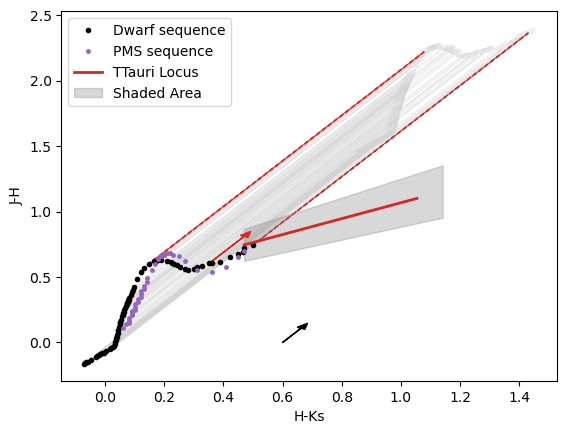

In [18]:
plt.plot(dwarf['H-Ks'].to_numpy(), dwarf['J-H'].to_numpy(),  'k.', label='Dwarf sequence')
# plt.plot(dwarf['H-Ks'][dwarf['SpT'] == 'M6V'], dwarf['J-H'][dwarf['SpT'] == 'M6V'],  'o', color='tab:red', label='M6 dwarf')
plt.plot(pms_giant.HKs, pms_giant.JH,  '.', color='tab:purple', ms=5, label='PMS sequence')
#
spt = 'K6V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')

spt = 'M9.5V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')

#
# plot CTTS locus
#
plt.plot([0.470, 1.054], [JH_ctts_2M(0.47), JH_ctts_2M(1.054)], '-', color='tab:red', label='TTauri Locus', lw=2)
plt.fill_between(HK_values, up_curve, bottom_curve, color='gray', alpha=0.3, label='Shaded Area')

# plt.plot([0.470, 1.054], [0.785736, 1.141], '-', color='tab:red', label='TTauri Locus', lw=2)
Av = 1.9
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == 'M6V']), float(dwarf['J-H'][dwarf.SpT == 'M6V']),dy=A_JH(Av), dx=A_HKs(Av), head_width=.03, color='tab:red')
#
Av = 1
plt.arrow(0.6, 0.0, dy=A_JH(Av), dx=A_HKs(Av), head_width=.03, color='k')
#
#
Av=15
for spt in dwarf.SpT : #['O9V', 'B9V', 'A0V', 'A1V', 'A2V', 'A3V',  'A7V']:
    plt.arrow(dwarf['H-Ks'].dropna()[dwarf.SpT == spt].iloc[0], 
              dwarf['J-H'].dropna()[dwarf.SpT == spt].iloc[0], dy=A_JH(Av),
              dx=A_HKs(Av), head_width=.03, color='lightgray',
              zorder=0, alpha=0.3)
#
Av = 1.5
# plt.arrow(dwarf['H-Ks'].dropna()[dwarf.SpT == 'M7V'].iloc[0], dwarf['J-H'].dropna()[dwarf.SpT == 'M7V'].iloc[0], dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.03, color='tab:pink', zorder=10)
# plt.plot(dwarf['H-Ks'][dwarf['SpT'] == 'M7V'].iloc[0], dwarf['J-H'][dwarf['SpT'] == 'M7V'].iloc[0],  'o', color='tab:pink')


plt.xlabel('H-Ks')
plt.ylabel('J-H')
plt.legend()

I am showing in the plot above that the usual definition for the CTTS locus will not work in our specific set of reddening law + photometric system + empirical sequence.

<u>Limitations in the original definition of the CTTS Locus:</u>

It is important no note that the CTTS Loci definition in [Mayer et al. 1997](https://ui.adsabs.harvard.edu/abs/1997AJ....114..288M/abstract) is aimed at reproducing the observed results for a sample was composed 70 YSOs (30 CTTS and 40 WTTS) located in Taurus, with spectral types between G0-M5. In fact, it is discussed in Meyer et al. 1997 that a few more embedded Class I and Flat Spectrum sources (such as HL Tau) are located beyond the redder-part of the CTTS Locus. These more embedded sources could not be explained by their model, except for a very specific set of parameters with very high-accretion rates $>10^{-6}$ and very large inner hole radius $>10R_*$. A more physical explanation for these is offered when considering the contribution of the envelope of embedded sources to their near-IR colours. 

Another point to be considered here is variability. Near-IR variability studies by [Roquette et al. 2020](https://ui.adsabs.harvard.edu/abs/2020A%26A...640A.128R/abstract) and [Rice et al. 2015](https://ui.adsabs.harvard.edu/abs/2015AJ....150..132R/abstract) reveal a significant fraction of YSO variables describing monotonic trajectories inside the JHK colour-colour diagram parallel to the CTTS Loci, including large amplitudes extending to outside the redder limit defined by [Mayer et al. 1997](https://ui.adsabs.harvard.edu/abs/1997AJ....114..288M/abstract) at $(H-K)_{CIT} = 1$ mag. 

![For example, this plot shows the variability trajectories of disk-bearing stars in red.](https://www.aanda.org/10.1051/0004-6361/201936984)

Finally, another caveat to be kept in mind is that the model examined in [Mayer et al. 1997](https://ui.adsabs.harvard.edu/abs/1997AJ....114..288M/abstract) considers a M5 star (roughly 0.5$M_\odot$). In their discussion, they examine the changes in their model by varying the source spectral type between K5-M5. They find that while the redward and blueward limits of the CTTS Locus changes as a function of spectral type, producing a maximum displacement of 0.15 mag in (J-H), the slope of the locus is constant. 

<u>Reviewing the CTTS Locus Limits:</u>

Theoretical investigations of the location of YSOs in the JHK colour-diagram with models have been expanded by [Robitaille et al. 2006](https://ui.adsabs.harvard.edu/abs/2006ApJS..167..256R/abstract) and [Robitaille 2009](https://ui.adsabs.harvard.edu/abs/2009PhDT.......188R/abstract). These authors have generated models covering a wider range of parameters and evolutionary stages, including sources from 0.1-50$M_\odot$. They do not discuss a direct equivalent concept to the CTTS Locus. Instead, they discuss the distribution of their model' colours inside the JHK colour space (along other colour spaces). Their Figure 23 in [Robitaille 2009](https://ui.adsabs.harvard.edu/abs/2009PhDT.......188R/abstract) is specially useful for our discussion. Here is the figure:

<img src="https://s3.amazonaws.com/aasie/images/0067-0049/167/2/256/10_1086_508424_fg23_hr.jpg" width="700"  style="clip: rect(0, 233px, 700px, 0); object-fit: cover;"/>

Note that although their models cover $(H-Ks)_{2M} = 0. - 3$, not all of this area is relevant in the context of the CTTS Locus since when talking about T Tauri stars, we are focusing on spectral types between G, K and M, hence the redder parts of the region shown in the figure.

**In the future @Ilknur could maybe redo this figure while keeping only these specific spectral types**

/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/2065894450.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/2065894450.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/2065894450.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser

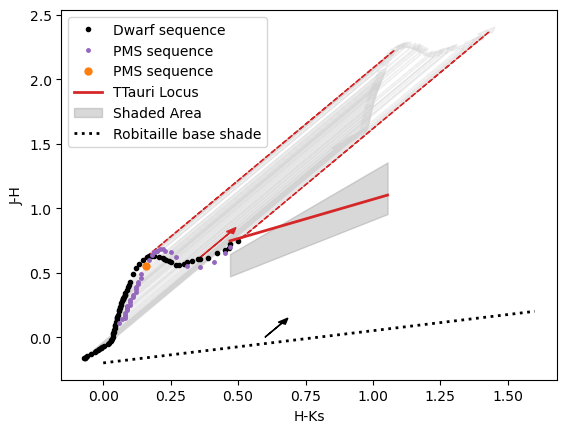

In [45]:
plt.plot(dwarf['H-Ks'].to_numpy(), dwarf['J-H'].to_numpy(),  'k.', label='Dwarf sequence')
# plt.plot(dwarf['H-Ks'][dwarf['SpT'] == 'M6V'], dwarf['J-H'][dwarf['SpT'] == 'M6V'],  'o', color='tab:red', label='M6 dwarf')
plt.plot(pms_giant.HKs, pms_giant.JH,  '.', color='tab:purple', ms=5, label='PMS sequence')

spt = 'K3'
plt.plot(pms_giant.HKs[pms_giant.SpT == spt], pms_giant.JH[pms_giant.SpT == spt],  '.', color='tab:orange', ms=10, label='PMS sequence')

#
spt = 'K6V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')

spt = 'M9.5V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')

#
# plot CTTS locus
#
HK_values = np.linspace(0.470, 1.054, 100)
plt.plot([0.470, 1.054], [JH_ctts_2M(0.47), JH_ctts_2M(1.054)], '-', color='tab:red', label='TTauri Locus', lw=2)
plt.fill_between(HK_values, up_curve, bottom_curve, color='gray', alpha=0.3, label='Shaded Area')

# plt.plot([0., 1.6], [JH_ctts_2M(0.), JH_ctts_2M(1.6)], ':', color='k', label='TTauri Locus', lw=2)
plt.plot([0., 1.6], [-0.2, 0.2], ':', color='k', lw=2, label = 'Robitaille base shade')

# plt.plot([0.470, 1.054], [0.785736, 1.141], '-', color='tab:red', label='TTauri Locus', lw=2)
Av = 1.9
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == 'M6V']), float(dwarf['J-H'][dwarf.SpT == 'M6V']),dy=A_JH(Av), dx=A_HKs(Av), head_width=.03, color='tab:red')
#
Av = 1
plt.arrow(0.6, 0.0, dy=A_JH(Av), dx=A_HKs(Av), head_width=.03, color='k')
#
#
Av=15
for spt in dwarf.SpT : #['O9V', 'B9V', 'A0V', 'A1V', 'A2V', 'A3V',  'A7V']:
    plt.arrow(dwarf['H-Ks'].dropna()[dwarf.SpT == spt].iloc[0], 
              dwarf['J-H'].dropna()[dwarf.SpT == spt].iloc[0], dy=A_JH(Av),
              dx=A_HKs(Av), head_width=.03, color='lightgray',
              zorder=0, alpha=0.3)
#


plt.xlabel('H-Ks')
plt.ylabel('J-H')
plt.legend()

Considering the [Mayer et al. 1997](https://ui.adsabs.harvard.edu/abs/1997AJ....114..288M/abstract) discussion that different stellar parameters will change the begining and end of the Classical T Tauri Locus but preserve its slope, it does make more sense for now to rather truncate the CTTS Locus based on the position of the empirical sequence for PMS Giants. For example, in the plot below I highlighted in orange the position of a K3 PMS diskless star. 

In [34]:
spt = 'K3'
HKs_K3 = float(pms_giant.HKs[pms_giant.SpT == spt].value)
JH_K3 = float(pms_giant.JH[pms_giant.SpT == spt].value)
print('H-Ks = {0}, J-H = {1}'.format(HKs_K3, JH_K3))


H-Ks = 0.16, J-H = 0.55


In [37]:
HK_values = np.linspace(HKs_K3, 1.141, 100)
up_curve = JH_ctts_2M(HK_values, 'up')
bottom_curve = JH_ctts_2M(HK_values, 'bottom')

/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/4196324657.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/4196324657.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_56450/4196324657.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser

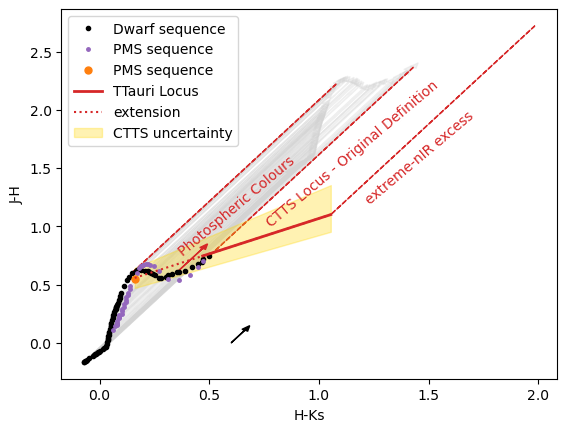

In [56]:
plt.plot(dwarf['H-Ks'].to_numpy(), dwarf['J-H'].to_numpy(),  'k.', label='Dwarf sequence')
# plt.plot(dwarf['H-Ks'][dwarf['SpT'] == 'M6V'], dwarf['J-H'][dwarf['SpT'] == 'M6V'],  'o', color='tab:red', label='M6 dwarf')
plt.plot(pms_giant.HKs, pms_giant.JH,  '.', color='tab:purple', ms=5, label='PMS sequence')

spt = 'K3'
plt.plot(pms_giant.HKs[pms_giant.SpT == spt], pms_giant.JH[pms_giant.SpT == spt],  '.', color='tab:orange', ms=10, label='PMS sequence')

#
spt = 'K6V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')

spt = 'M9.5V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')


Av = 15
# plt.arrow(HKs_K3, JH_K3, dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')
plt.arrow(1.054, JH_ctts_2M(1.054), dy=A_JH(Av), dx=A_HKs(Av), head_width=.0, color='tab:red', linestyle='dashed')

#
# plot CTTS locus
#
HK_values = np.linspace(HKs_K3, 1.054, 100)
plt.plot([0.470, 1.054], [JH_ctts_2M(0.47), JH_ctts_2M(1.054)], '-', color='tab:red', label='TTauri Locus', lw=2)
plt.plot([HKs_K3, 1.054], [JH_ctts_2M(HKs_K3), JH_ctts_2M(1.054)], ':', color='tab:red', label='extension', zorder=10)
plt.fill_between(HK_values, up_curve, bottom_curve, color='gold', alpha=0.3, label='CTTS uncertainty')


# plt.plot([0.470, 1.054], [0.785736, 1.141], '-', color='tab:red', label='TTauri Locus', lw=2)
Av = 1.9
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == 'M6V']), float(dwarf['J-H'][dwarf.SpT == 'M6V']),dy=A_JH(Av), dx=A_HKs(Av), head_width=.03, color='tab:red')
#
Av = 1
plt.arrow(0.6, 0.0, dy=A_JH(Av), dx=A_HKs(Av), head_width=.03, color='k')
#
#
Av=15
for spt in dwarf.SpT : #['O9V', 'B9V', 'A0V', 'A1V', 'A2V', 'A3V',  'A7V']:
    plt.arrow(dwarf['H-Ks'].dropna()[dwarf.SpT == spt].iloc[0], 
              dwarf['J-H'].dropna()[dwarf.SpT == spt].iloc[0], dy=A_JH(Av),
              dx=A_HKs(Av), head_width=.03, color='lightgray',
              zorder=0, alpha=0.3)

plt.text(x=0.35, y=0.75, s='Photospheric Colours', color='tab:red', rotation=40)
plt.text(x=0.75, y=1, s='CTTS Locus - Original Definition', color='tab:red', rotation=40)
plt.text(x=1.2, y=1.2, s='extreme-nIR excess', color='tab:red', rotation=40)

plt.xlabel('H-Ks')
plt.ylabel('J-H')
plt.legend()

<u>**An analytical derivation for $A_V$ in the JHK colour-space with uncertainties:**</u>

For my PhD thesis, I have derived $A_V$s from the JHK colour-space by estimate the line interception between the reddening vector and the CTTS Locus, and then using either the x- or y-axis displacement to derive $A_V$. This interception was estimated using the following functions. 

In [24]:
def line(p1, p2):
    """Defines a line that crosses two poitns"""
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0] * p2[1] - p2[0] * p1[1])
    return A, B, -C

In [25]:
def intersection(L1, L2):
    """Finds the intersection beteen two lines"""
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x, y
    else:
        return False

/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_31971/1497505951.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_31971/1497505951.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.0, color='tab:red', linestyle='dashed')
/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_31971/1497505951.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError i

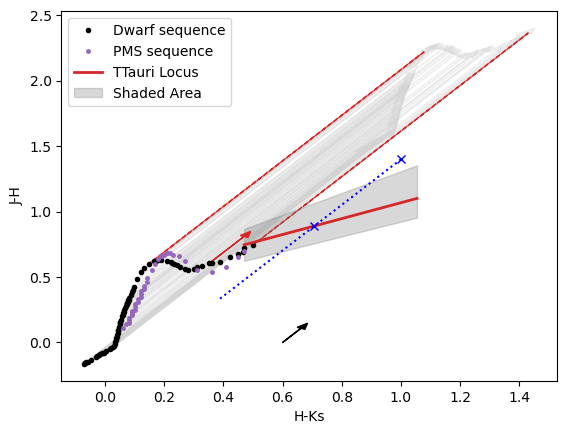

In [26]:
plt.plot(dwarf['H-Ks'].to_numpy(), dwarf['J-H'].to_numpy(),  'k.', label='Dwarf sequence')
# plt.plot(dwarf['H-Ks'][dwarf['SpT'] == 'M6V'], dwarf['J-H'][dwarf['SpT'] == 'M6V'],  'o', color='tab:red', label='M6 dwarf')
plt.plot(pms_giant.HKs, pms_giant.JH,  '.', color='tab:purple', ms=5, label='PMS sequence')
#
spt = 'K6V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.0, color='tab:red', linestyle='dashed')

spt = 'M9.5V'
Av = 15
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == spt]), float(dwarf['J-H'][dwarf.SpT == spt]), dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.0, color='tab:red', linestyle='dashed')

#
# plot CTTS locus
#
plt.plot([0.470, 1.054], [JH_ctts_2M(0.47), JH_ctts_2M(1.054)], '-', color='tab:red', label='TTauri Locus', lw=2)
plt.fill_between(HK_values, up_curve, bottom_curve, color='gray', alpha=0.3, label='Shaded Area')

# plt.plot([0.470, 1.054], [0.785736, 1.141], '-', color='tab:red', label='TTauri Locus', lw=2)
Av = 1.9
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == 'M6V']), float(dwarf['J-H'][dwarf.SpT == 'M6V']),dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.03, color='tab:red')
#
Av = 1
plt.arrow(0.6, 0.0, dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.03, color='k')
#
#
Av=15
for spt in dwarf.SpT : #['O9V', 'B9V', 'A0V', 'A1V', 'A2V', 'A3V',  'A7V']:
    plt.arrow(dwarf['H-Ks'].dropna()[dwarf.SpT == spt].iloc[0], 
              dwarf['J-H'].dropna()[dwarf.SpT == spt].iloc[0], dy=A_J(Av)-A_H(Av),
              dx=A_H(Av)-A_Ks(Av), head_width=.03, color='lightgray',
              zorder=0, alpha=0.3)
#
#
star = (1.0, 1.4)
plt.plot(star[0], star[1],  'bx')
plt.plot([star[0], star[0] + A_H(-10)-A_Ks(-10)], [star[1], star[1] + A_J(-10)-A_H(-10)], 'b:')
L1 = line(star, (star[0] + A_H(-10)-A_Ks(-10), star[1] + A_J(-10)-A_H(-10)))
L2 = line((0.470, JH_ctts_2M(0.47)), (1.054, JH_ctts_2M(1.054)))
x_, y_ = intersection(L1, L2)
plt.plot(x_, y_,  'bx')


plt.xlabel('H-Ks')
plt.ylabel('J-H')
plt.legend()

A more robust version of that can be used for deriving $A_V$ values with uncertainty, while considering the uncertainties behind both the CTTS locus definition, the extinction law and the photometric uncertainty. 

/var/folders/3v/wynxxyd55nq14hvn15_n_f400000gn/T/ipykernel_31971/2980308652.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == 'M6V']), float(dwarf['J-H'][dwarf.SpT == 'M6V']),dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.03, color='k')


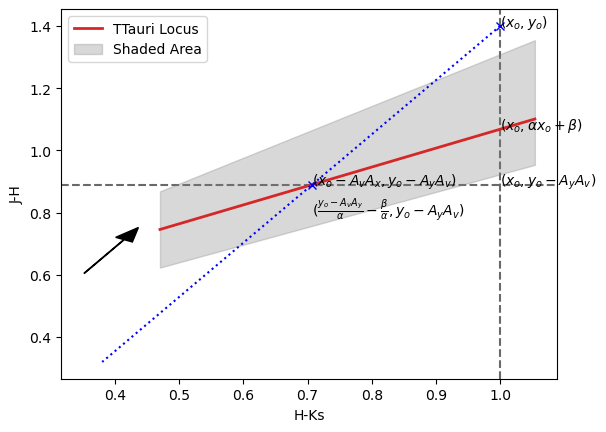

In [27]:
#
# plot CTTS locus
#
plt.plot([0.470, 1.054], [JH_ctts_2M(0.47), JH_ctts_2M(1.054)], '-', color='tab:red', label='TTauri Locus', lw=2)
plt.fill_between(HK_values, up_curve, bottom_curve, color='gray', alpha=0.3, label='Shaded Area')

# plt.plot([0.470, 1.054], [0.785736, 1.141], '-', color='tab:red', label='TTauri Locus', lw=2)
Av = 1
plt.arrow(float(dwarf['H-Ks'][dwarf.SpT == 'M6V']), float(dwarf['J-H'][dwarf.SpT == 'M6V']),dy=A_J(Av)-A_H(Av), dx=A_H(Av)-A_Ks(Av), head_width=.03, color='k')
#
#
#
star = (1.0, 1.4)
plt.text(star[0], star[1], s=r'$(x_o, y_o)$', ha='left')
plt.plot(star[0], star[1],  'bx')
#
plt.plot([star[0], star[0] + A_H(-10)-A_Ks(-10)], [star[1], star[1] + A_J(-10)-A_H(-10)], 'b:')
L1 = line(star, (star[0] + A_H(-10)-A_Ks(-10), star[1] + A_J(-10)-A_H(-10)))
L2 = line((0.470, JH_ctts_2M(0.47)), (1.054, JH_ctts_2M(1.054)))
x_, y_ = intersection(L1, L2)
plt.plot(x_, y_,  'bx')
plt.axhline(y_, color='dimgray', linestyle='dashed', zorder=0)
plt.axvline(star[0], color='dimgray', linestyle='dashed', zorder=0)

plt.text(star[0], JH_ctts_2M(star[0]), s=r'$(x_o, \alpha x_o + \beta)$', ha='left')

plt.text(star[0], y_, s=r'$(x_o, y_o-A_yA_v)$', ha='left')

plt.text(x_, y_, s=r'$(x_o-A_vA_x, y_o-A_yA_v)$', ha='left')
plt.text(x_, y_-0.1, s=r'$(\frac{y_o-A_vA_y}{\alpha}-\frac{\beta}{\alpha}, y_o-A_yA_v)$', ha='left')

plt.xlabel('H-Ks')
plt.ylabel('J-H')
plt.legend()

This can be done as folows. 

First, I redefined the CTTS locus equation as $y = \alpha x + \beta$

with $(J-H)_{2M}\rightarrow y$,  $(H-Ks)_{2M}\rightarrow x$,  $\alpha\rightarrow (0.608\pm 0.116)$, and $\beta\rightarrow (0.460 \pm 0.068)$.

Next, considering that the observed data a a given star given colours $x_o$, $y_o$ with uncertainties $\sigma_{x_o}$ and $\sigma_{y_o}$, we can use both the TTauri Locus definition and the reddening law to deduct $x_{dered}$, hence:

$x_o-A_VA_x=\frac{y_o-A_VA_y}{\alpha}-\frac{\beta}{\alpha}$

$x_o+\frac{\beta}{\alpha}=\frac{y_o}{\alpha}-\frac{A_VA_y}{\alpha}+A_VA_x$, where $A_y\rightarrow A_{J-H} = (0.108 \pm 0.018)$ and $A_x\rightarrow A_{H-Ks}=(0.062 \pm 0.009)$


$A_V(x_o, y_o, \alpha, \beta, A_x, A_y) = \frac{y_o-\beta-\alpha x_o}{A_y-\alpha A_x}$

The uncertainty of each of the dependent variables can be propagated as:

$\sigma_{A_V} = \sqrt{\sum_i\sigma_{k_i}^2\Bigg(\frac{\delta A_V}{\delta k_i}\Bigg)^2}$,

where $k_i$ is each of the dependent variables $(x_o, y_o, \alpha, \beta, A_x, A_y)$.


In [28]:
def get_Av(HKs, eHKs, JH, eJH):
    """
    Retrieves Av from dereddening the source
    inside the JHKs colour-colour diagram down to 
    the CTTS Loci
    """
    alfa = 0.608
    e_alfa = 0.116
    beta = 0.460
    e_beta = 0.068
    AJH = 0.108
    e_AJH = 0.018
    AHKs = 0.062
    e_AHKs = 0.009
    Av = (JH - beta - alfa * HKs) / (AJH - alfa * AHKs)
    eAv = np.sqrt(
        (-eHKs * alfa / (AJH - alfa * AHKs))**2 + #error propagation x_o
        (eJH / (AJH - alfa * AHKs))**2 + #error propagation y_o
        ((e_alfa * (-AJH * HKs - beta * AHKs + AHKs * JH) / 
          (AJH - alfa * AHKs)**2))**2 + #error propagation alfa
        (e_beta / (-AJH + alfa * AHKs))**2 + #error propagation for beta
        (e_AHKs * (alfa * HKs + beta - JH) / (AJH - alfa * AHKs)**2)**2 + #error propagation for Ax
        (e_AJH * alfa * (alfa * HKs + beta - JH)/ (AJH - alfa * AHKs)**2)**2) # error propagation for Ay
    return Av, eAv

In [31]:
get_Av(star[0], 0., star[1], 0.)

(4.722348657259899, 1.7896952118664429)

In [33]:
assert (star[0] - A_HKs(get_Av(star[0], 0., star[1], 0.)[0]) - x_) <= 0.001
assert (star[1] - A_JH(get_Av(star[0], 0., star[1], 0.)[0]) - y_) <= 0.001